In [0]:
#@title Imports
!pip install -q symbulate
from symbulate import *

import random
import statistics
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Analyzing Boostrapping and Bootstrap Aggregation (Bagging)**

By **Josiah Lashley** and **Steven Taruc**
STAT 427 Final Project
6-5-20

**What is Bootstrapping?**

The bootstrapping technique is a method of resampling sample data with replacement to estimate a population distribution. Boostrapping has many uses such as conducting hypothesis tests and confidence intervals. This method is advantageous due to its simplicity and its accuracy compared to normality and other assumptions.


**When to use Bootstrapping?**



*   Small Sample Size
*   Standard Error for a Test Statistic is hard to compute
*   Unkown Population Distribution



## **False Positives and Power with Bootstrapping**

**We wish to see the False Discovery Rate using the Bootstrapp method on a Normal Distribution of the specific hypothesis test below**

**In order to calculate the False Discovery Rate we will be assuming that the true Distribution does have a mean of 0.**

$X$ ~ $ N(\mu,\sigma)$ **Where** $\sigma$ **is unknown**

$H_0: \mu = 0$

$H_A: \mu \gt 0$

The first step in bootstrapping is to take samples of your data and put them into "bags". Each bag has a length of $n'$ where $n'\leq n$. The support function below is in charge of doing just that.


In [0]:
def make_bag(data,n):
  # Initialized the bag 
  bag = []
  while len(bag) < n:
    # appending a random data point in the overall data to be included in this bag
    ids = [i for i in range(len(data))]
    rand_id = random.choice(ids)
    bag.append(data[rand_id])
  # when the bag is completed, the bag is returned.
  return bag

The support function below is counting the number of times the bootstrap statistic was greater than or equal to the null hypothesis statistic.

In [0]:
def get_p(data,mu,k):
  p = 0
  for d in data: 
    if d < mu:
      p +=1 
  return p

Now, moving on to the main bootstrapping function. This function will go through and make K number of bags and add the mean of each bag to the bags list. After doing so it goes through the get_p function in order to obtain the p-value of our observed data

In [0]:
# K = number of bags
# n = n' (ie number of data points in each bag)
def boot(k,data,mu,n):
  bags = []
  for i in range(k):
    # create a bag
    bags.append(np.mean(make_bag(data,n)))
    # add the results of the test
  p = get_p(bags,mu,k)
  return p/k

For simplicity I will be simulating values from a Normal distribution but for the sake of the example lets imagine we aren't sure what the distribution looks like or the variance and all we want to know is weather or not the population mean is 0.

Part A might show a common scenario where you only have 15 observations, where since we don't know that the data follows a normal distribution we are un able to apply the CLT but you still want to get a p-value and a significance test from this. Bootstrapping allows you to do this.

In [5]:
# A)
Xa = Normal(0,1)
xa_sims = list(Xa.sim(15))
boot(10000,xa_sims,0,10)

0.2286

One signel p-value, like the one generated above is going to varry very much simulation to simulation so, in order to take a look at false positive rates, we went and simulated the code above 100 times to see how many of those 100 had a p-value of less than or equal to .05 and then graphed them

In [0]:
# A)
Xa = Normal(0,1)
results = []
for i in range(100):
  xa_sims = list(Xa.sim(15))
  results.append(boot(10000,xa_sims,0,10))

0.08


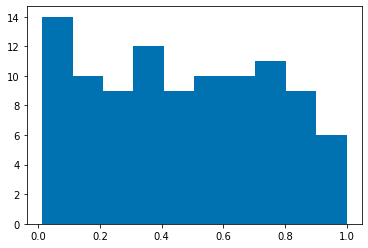

In [7]:
plt.hist(results)
c = 0
for r in results:
  if r <= .05:
    c += 1
print(c/len(results))

Looking at the histogram above we can see that it looks roughly semetric which is good. We have obtained an false postive rate of .02! Which is really good knowing that the true population had a mean of 0 and we didn't have to know anything about the distribution to calculate this.

Looking at this graph and this error rate, we can say that the bootstrapping method does a great job on rarely producing false postives. Which depending on the real life scenario, is very powerful.

Now we want to look at a scenario where the true population parameter aligns more with the alernative hypothesis

In [0]:
# B)
Xb = Normal(1,1)
results = []
for i in range(100):
  xb_sims = list(Xb.sim(15))
  results.append(boot(10000,xb_sims,0,10))

0.98


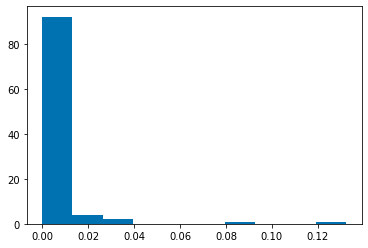

In [9]:
plt.hist(results)
c = 0
for r in results:
  if r <= .05:
    c += 1
print(c/len(results))

Now when we have a scenario where the alternative is true, we get very strong power of about .95, which is really good! Boostrapping and Bagging shows that you're able to get very strong results of power when we aren't even sure of the distribution.

In part C we are going to explore the false postive when we even lower the simulated values of 



In [0]:
# C)
Xc = Normal(0,1)
results = []
for i in range(100):
  xc_sims = list(Xc.sim(5))
  results.append(boot(10000,xc_sims,0,4))

0.04


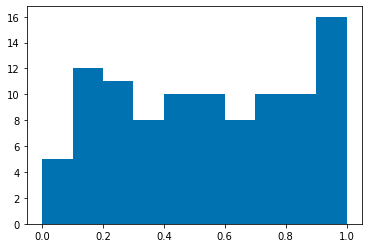

In [11]:
plt.hist(results)
c = 0
for r in results:
  if r <= .05:
    c += 1
print(c/len(results))

Looking at the output and the graph above we still see that we have a low false postive rate which is very good considering that our sample size has become even smaller. 

## **Exponential Bootstrapping**

We are going to use the functions above but we are going to look at an Exponential Distribution. For this example the Hypothesis will be as follows

$X$ ~ $ E(\mu_0)$

$H_0: \mu = \mu_0$

$H_A: \mu \lt \mu_0$

In part A of this example we are going to look at the false postive rate of an exponential distribution with $\mu = \frac{1}{2}$ and we once again want to see what the false positive rate will be but for an exponential distribution

In [0]:
# A)
Ea = Exponential(1/2)
results = []
for i in range(100):
  ea_sims = list(Ea.sim(15))
  results.append(boot(10000,ea_sims,2,10))

0.03


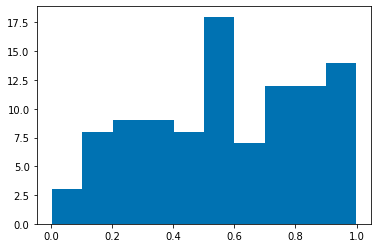

In [13]:
plt.hist(results)
c = 0
for r in results:
  if r <= .05:
    c += 1
print(c/len(results))

Once again looking at the graphs above we can see that bootstrapping does an amazing job at keeping the false positives to a minimum without any  knowledge of the distribution. Only thing that is needed is the null mean. 

In part B, we are going to look at the power of one of these tests when the sample size is even smaller. 

In [0]:
# B)
Ea = Exponential(1/4)
results = []
for i in range(100):
  ea_sims = list(Ea.sim(10))
  results.append(boot(10000,ea_sims,2,5))

0.33


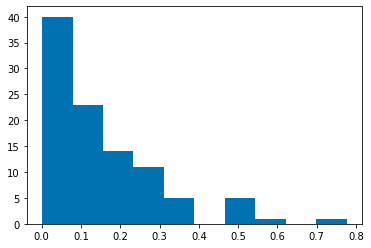

In [15]:
plt.hist(results)
c = 0
for r in results:
  if r <= .05:
    c += 1
print(c/len(results))

When we look at this example we are able to see that the power is definatly not as strong from when we sampled from a normal distribution. For this simulation in particular we obtained a power of about .36 which is not very strong at all. 

So, when comparing Boostraping when the population distribution follows a normal distribution compared to an exponential distribution we gat varying results. Which is not suprising since Normal distributions are very consistent and are great for yeilding accurate results. But in these examples we showed that even though the two distributions were completely different, if we apply the same bootstrapping method to them we are able to achieve a low false positive rate.

But, something very important to learn from this is that bootstrapping is a very good test and method to apply when it is very important to keep false positvies to a minimum. Such examples could be with medical equipment and diagnoses where you want to be sure when you accept the alternative hypothesis.


## **Poisson Bootstrapping**

The standard bootstrap procedure creates each resampled dataset by drawing observations from the sample $X$ with replacement, so from $n$ observations we draw $n$ with replacement.

Therefore, each observation from the sample may occur 0,1, or more times according to the $Binomial(n,1/n)$. Since the total number of observations is n, the counts are jointly $Multinomial(n,1/n,⋯,1/n)$.

For example, if we have a sample of size 4 = $[1,2,3,4]$, our bootstrap resample disctribution would follow 
$Multinomial(4,\frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4})$. For small samples, the multinomial approach is better at estimating standard errors. 

When it comes to large sample sizes, the multinomial boostrap is problematic. The sum of counts in the multinomial distribution are fixed, which causes negative correlation with one another. In the real world, we may not know the total number of observations.

This is where Poisson Boostrapping comes along. We can sample each observation in each bootstrap sample independently from $Binomial(n,\frac{1}{n})$. However
it turns out that $$\lim_{x\to\infty} Binomial(n,\frac{1}{n}) = Poisson(1)$$ 

Therefore, we can independently sample the amount of each observation without having to know $n$. 


In [16]:
sample = [12,34,42,56,23,45]
B = 5

for i in range(B):
  p_samples = []
  for i in sample:
    p_samples.append(Poisson(1).draw())
    new_sample = []
    for idx, num in enumerate(p_samples):
      for l in range(num):
        new_sample.append(sample[idx])

  print("Number of selections per value: ",p_samples)
  print("Poisson resample: ",new_sample)
  print("\n")

Number of selections per value:  [2, 0, 0, 0, 0, 0]
Poisson resample:  [12, 12]


Number of selections per value:  [1, 1, 2, 0, 3, 1]
Poisson resample:  [12, 34, 42, 42, 23, 23, 23, 45]


Number of selections per value:  [0, 3, 1, 2, 1, 0]
Poisson resample:  [34, 34, 34, 42, 56, 56, 23]


Number of selections per value:  [0, 2, 0, 2, 4, 1]
Poisson resample:  [34, 34, 56, 56, 23, 23, 23, 23, 45]


Number of selections per value:  [1, 0, 0, 2, 1, 3]
Poisson resample:  [12, 56, 56, 23, 45, 45, 45]




In the example above, we notice that some resamples can only have 2 or a small number of elements. This will not be an issue when $n \geq 100$ because the count in each resample will likely be close to $n$ or within $n±\sqrt2$.

## **Bootstrap Aggregation (Bagging) in Machine Learning**

In machine learning, a common method of optimizing a model is combining multiple models together to produce one whole model. This process is called the **ensemble meta-algorithm** intended to improve stability and accuracy in classifiers and regressors. This method reduces variability and helps avoid models that overfit the data.

When we develop a machine learning model for a set of data, we separate the data into **training data** and **testing data**. The training data is used to train the classifier or regressor and is then tested on the testing data to determine the model's accuracy and variability. We then use **cross-validation** by subsetting the sample data to unique sets of training and testing sets to further test and solidify the model.

**Bootstrap aggregation** or **bagging**, is an ensemble method that generates $m$ training subsets of sample data $D$ through bootstrapping (uniformly with replacement). It then fits $m$ models using the $m$ bootstrapped samples and are combined by averaging the output for regression and votes the output for classification.

Bagging is used in many types of machine learning algorithms like classification trees, linear regression, and neural networks.

### **Bagging with Linear Regression**

In this example, we will be comparing the bagging technique with a well-known machine learning model called K-Nearest Neighbors. KNN can be used as a regressor for determining values based on averaging the $k$ nearest sample data points from the suspected data point. 

We use Sci-Kit Learn to make a sample dataset of all quantitative variables of length $n$ = 1000 with 5 features. 

We run the KNN model and Bagging Model on the data and evaluate the mean absolute errors using the same cross validation schema. 

In [17]:
# Create a Dataset
X, y = make_regression(n_samples=1000, n_features=5, n_informative=15, noise=0.1, random_state=10)

# Define models
knn_model = KNeighborsRegressor(n_neighbors=5)
bagging_model = BaggingRegressor()

# Evalueate models
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_scores = -cross_val_score(knn_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
bagging_scores = -cross_val_score(bagging_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('K-Nearest Neighbors MAE: %.3f (%.3f)' % (mean(knn_scores), std(knn_scores)))
print('Bagging MAE: %.3f (%.3f)' % (mean(bagging_scores), std(bagging_scores)))

K-Nearest Neighbors MAE: 22.065 (2.042)
Bagging MAE: 16.334 (1.283)


As we can see from the results, the bagging model has a significantly less MAE, proving it has less variability in predicting values.

### **Bagging with Classification**

Same as above, we can compare a KNN classifying model with the bagging classifier in determining categorical variables from a set of features. 

In this case, we are using the same type of model (KNN Model of 5 nearest neighbors) for each resampled bag from the sample data. 

Our evaluation method is determining the accuracy of the model with the same cross validation schema

In [18]:
# Create a Dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)

# Define models
knn_classifier = KNeighborsClassifier(n_neighbors=5)
b_classifier = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5))

# Evaluate models
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_scores = mean(cross_val_score(knn_classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise'))
b_scores = mean(cross_val_score(b_classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise'))

print("Accuracy of KNN Classifier: ", round(knn_scores,5))
print("Accuracy of Bagging Classifier: ", round(b_scores,5))

Accuracy of KNN Classifier:  0.88167
Accuracy of Bagging Classifier:  0.88267


Although the accuracy's are similar, we can see improvement with using multiple bags to reduce variability in the ensemble model.